In [196]:
import os
from os import walk
import numpy as np
# load your data
paths = ["/Volumes/Gerardo HD/sintesis_dataset/am","/Volumes/Gerardo HD/sintesis_dataset/fm","/Volumes/Gerardo HD/sintesis_dataset/grain","/Volumes/Gerardo HD/sintesis_dataset/res","/Volumes/Gerardo HD/sintesis_dataset/waveshapping"]
#print(paths)
audios = []
labels = []
labelsname = []
for i in paths:
    for (dirpath, dirnames, filenames) in walk(i):
        for filename in filenames:
            audios.append(os.path.join(dirpath, filename))
            #audios.append(filename)
            #print(audios)
            if filename.startswith("am"):
                labels.append(0)
                labelsname.append("am")
            elif filename.startswith("fm"):
                labels.append(1)
                labelsname.append("fm")
            elif filename.startswith("grain"):
                labels.append(2)
                labelsname.append("grain")
            elif filename.startswith("res"):
                labels.append(3)
                labelsname.append("res")
            elif filename.startswith("waveshapping"):
                labels.append(4)
                labelsname.append("waveshapping")
        #print(filenames)
        #audios.append(filenames)
        break


In [252]:
import librosa
import numpy as np
#print(audios)
data = []
nsr = 22050
##print(audios[2])
for track in audios:
    y,fs = librosa.load(track)
    y = librosa.resample(y,fs,nsr)
    #x = librosa.feature.melspectrogram(y, sr=22050,n_fft=2048,hop_length= 2048)
    #print(x.shape)
    #x = librosa.stft(y, n_fft=512, hop_length=len(y)//(120-1)).T
    #x = librosa.stft(y, n_fft = self.nfft, hop_length=len(x)//(self.ntime-1)).T
    #data.append(librosa.amplitude_to_db(np.abs(x))[...,np.newaxis])
    #x = librosa.amplitude_to_db(np.abs(x))
    f2 = np.mean(librosa.yin(y,100,8093,sr= nsr,frame_length= 2048,win_length= 1024))
    sc = np.mean(librosa.feature.spectral_centroid(y=y,sr=nsr,hop_length= 1024,win_length= 2048)[0])
    rms = librosa.feature.rms(y=y,)[0]
    #print(rms)
    ##f1 = np.mean(librosa.feature.spectral_centroid(y,22050,hop_length= 1024,win_length= 2048)[0])
    #print(f1)
    rms = rms.flatten()
    x = np.append(rms,f2)
    x = np.append(x,sc)
    #x = np.append(x)

    #print(x.shape)
    #data.append(x)
    data.append(x)


data = np.array(data)
print(data.shape)

(1000, 175)


In [242]:
###para espectograma
import librosa
import numpy as np
#print(audios)
data = []
nsr = 22050
##print(audios[2])
for track in audios:
    y,fs = librosa.load(track)
    y = librosa.resample(y,fs,nsr)
    #x = librosa.feature.melspectrogram(y, sr=22050,n_fft=2048,hop_length= 2048)
    #print(x.shape)
    x = librosa.stft(y, n_fft=512, hop_length=len(y)//(120-1)).T
    #x = librosa.stft(y, n_fft = self.nfft, hop_length=len(x)//(self.ntime-1)).T
    #data.append(librosa.amplitude_to_db(np.abs(x))[...,np.newaxis])
    x = librosa.amplitude_to_db(np.abs(x))
    f2 = np.mean(librosa.yin(y,100,2093,sr=nsr,frame_length= 2048,win_length= 1024))
    
    ##f1 = np.mean(librosa.feature.spectral_centroid(y,22050,hop_length= 1024,win_length= 2048)[0])
    #print(f1)
    #x = x.flatten()
    #x = np.append(x,f2)
    #x = np.append(x)

    #print(x.shape)
    data.append(x)


data = np.array(data)
print(data.shape)

(1000, 120, 257)


(1025, 126)


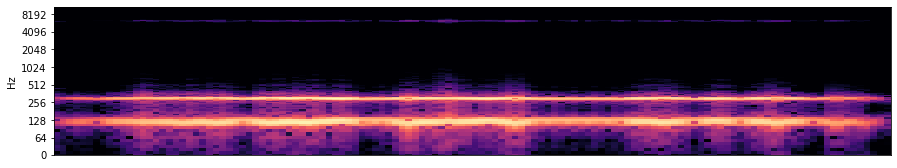

In [ ]:
import matplotlib.pyplot as plt 
import librosa.display
x,fs = librosa.load(audios[500])
x = librosa.resample(x,fs,16000)
x = librosa.stft(x, n_fft=2048, hop_length=512)
x = librosa.amplitude_to_db(np.abs(x))
print(x.shape)
plt.figure(figsize=(15, 6))
plt.subplot(2,1,1)
librosa.display.specshow(x, y_axis='log')
plt.show()

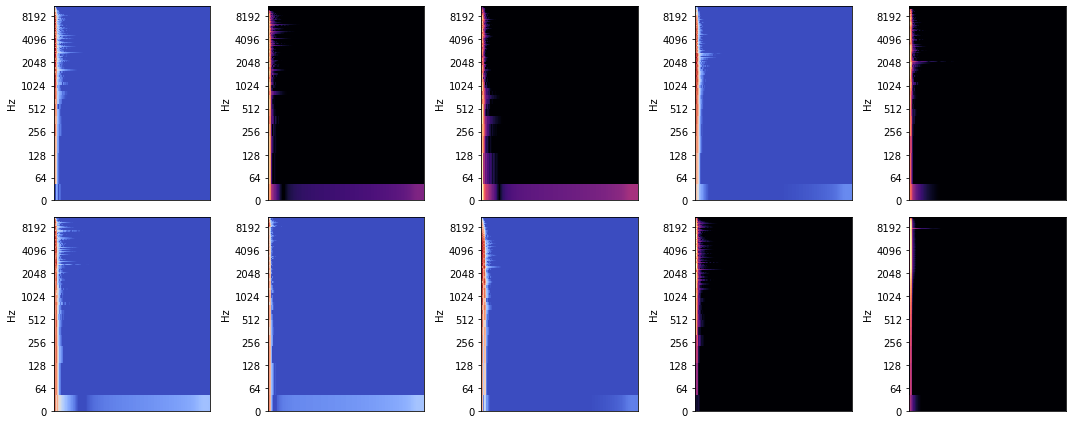

In [ ]:
# visualize a few raw datapoints to get an idea about your "raw" data
# what are the units in the plot you are showing us?
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(15, 6))
for i, x in enumerate(data[:10]):
    plt.subplot(2, 5, i+ 1)
    librosa.display.specshow(x,y_axis='log')
plt.tight_layout()

plt.show()

In [ ]:
print(data[1][0].shape)

(192000,)


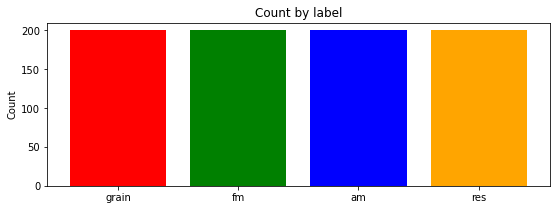

In [ ]:
# visualize the labels of your dataset (could be as simple as a table)
# how many labels are there available per each datapoint?
# how are the different labels useful/needed?
import matplotlib.pyplot as plt
import numpy as np  

names = list(set(labelsname))
values = [labelsname.count(i) for i in names]
color = ['red', 'green', 'blue', 'orange']
plt.figure(figsize=(9, 3))
plt.bar(names, values,color=color)
plt.ylabel('Count')
plt.title('Count by label')
plt.show()

In [253]:
# pre-process the data (as needed before you can show it to your model).

# plot a few datapoints in your pre-processed data. 

# what's different between the plots of "raw" data and "pre-processed" data?
# how do these differences make it easier for the model to learn from your data?

mu_ = np.mean(data,axis= 0)
print(mu_.shape)
s_ = np.std(data, axis = 0)
print(s_.shape)
#print(max_.shape)
#mu_vl = np.mean(data, axis= 1)[...,np.newaxis]
#max_vl = np.max(data,axis=1)[...,np.newaxis]

X = (data-mu_)/s_
#Xvl = (data-mu_vl)/max_vl

(175,)
(175,)


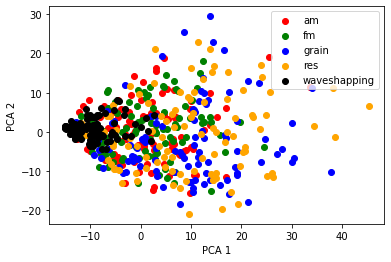

In [254]:
# plot ALL of your training data using t-SNE and PCA (must plot both)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(X)

plt.scatter(X_PCA[:100, 0], X_PCA[:100, 1], c='red', label='am')
plt.scatter(X_PCA[100:200, 0], X_PCA[100:200, 1], c='green', label='fm')
plt.scatter(X_PCA[200:300, 0], X_PCA[200:300, 1], c='blue', label='grain')
plt.scatter(X_PCA[300:400, 0], X_PCA[300:400, 1], c='orange', label='res')
plt.scatter(X_PCA[400:500, 0], X_PCA[400:500, 1], c='black', label='waveshapping')
plt.legend()

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

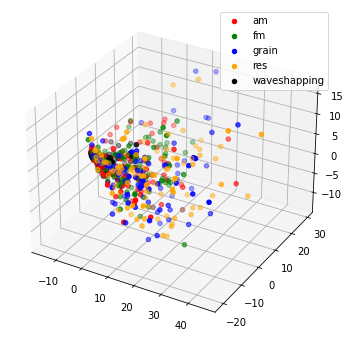

In [255]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig,elev=-20, azim=100)
X_reduced = PCA(n_components=3).fit_transform(X)

##fig = plt.figure(1, figsize=(12, 8))
ax = plt.axes(projection = "3d")
ax.scatter3D(X_reduced[:100, 0], X_reduced[:100, 1], X_reduced[:100, 2], c='red', label='am')
ax.scatter3D(X_reduced[100:200, 0], X_reduced[100:200, 1], X_reduced[100:200, 2], c='green', label='fm')
ax.scatter3D(X_reduced[200:300, 0], X_reduced[200:300, 1], X_reduced[200:300, 2], c='blue', label='grain')
ax.scatter3D(X_reduced[300:400, 0], X_reduced[300:400, 1], X_reduced[300:400, 2], c='orange', label='res')
ax.scatter3D(X_reduced[400:500, 0], X_reduced[400:500, 1], X_reduced[400:500, 2], c='black', label='waveshapping')
ax.view_init(30,300)
ax.legend()
plt.show()


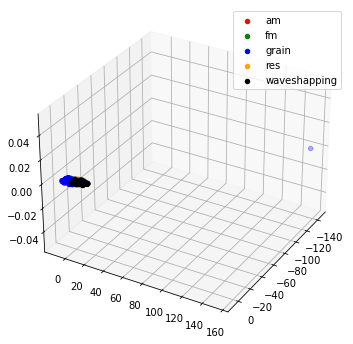

In [256]:
###t-SNE
from sklearn.manifold import TSNE  # for t-SNE
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig,elev=-20, azim=100)
tsne = TSNE(n_components=3)  # create an instance of t-SNE
ax = plt.axes(projection = "3d")
X_tsne = tsne.fit_transform(X)  # fit and transform the data
ax.scatter3D(X_tsne[:100,0], X_tsne[:100,1], c='red', label='am')
ax.scatter3D(X_tsne[100:200,0], X_tsne[100:200,1], c='green', label='fm')
ax.scatter3D(X_tsne[200:300,0], X_tsne[200:300,1], c='blue', label='grain')
ax.scatter3D(X_tsne[300:400,0], X_tsne[300:400,1], c='orange', label='res')
ax.scatter3D(X_tsne[400:500,0], X_tsne[400:500,1], c='black', label='waveshapping')
ax.view_init(30,30)
ax.legend()
plt.show()

In [194]:
import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input, BatchNormalization,UpSampling2D
from keras import Model

# input layer
#input_layer = Input(shape=(300,257,173))
input_layer = Input(shape = (120,257,1))

# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view    = MaxPool2D( (2, 2), padding='same')(encoded_layer3)

# decoding architecture
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer   = Conv2D(1, (3, 3), padding='same', activation='sigmoid')(decoded_layer3)

# compile the model
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

In [195]:
model.fit(X, X, epochs=100)


Epoch 1/100


ValueError: in user code:

    File "/Users/gerardomeza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/gerardomeza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/gerardomeza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/gerardomeza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/gerardomeza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "/Users/gerardomeza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/gerardomeza/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/gerardomeza/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/gerardomeza/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 1329, in mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 116 and 120 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](mean_squared_error/remove_squeezable_dimensions/Squeeze, IteratorGetNext:1)' with input shapes: [?,116,260], [?,120,257].


In [186]:
import tensorflow as tf

inputs = tf.keras.Input(shape = (120,1+256,1))
ntime = 120
nfft = 256
nclasses = 10
reg = 1e-2
lr = 0.01
# defining the CNN
encoded = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding='SAME')(inputs)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded)
encoded = tf.keras.layers.Conv2D(32, 3, activation = 'relu', padding='SAME')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded)
encoded = tf.keras.layers.Conv2D(16, 3, activation = 'relu', padding='SAME')(encoded_layer1)
latent_view    = MaxPool2D( (2, 2), padding='same')(encoded)
###############################################################################
# defining the decoder
decoded = tf.keras.layers.Conv2D(16, 3, activation = 'relu', padding='SAME')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded)
decoded = tf.keras.layers.Conv2D(32, 3, activation = 'relu', padding='SAME')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded)
decoded = tf.keras.layers.Conv2D(64, 3, activation = 'relu')(decoded_layer2)
decoded = UpSampling2D((2, 2))(decoded)
outputs = tf.keras.layers.Conv2D(1, 3, activation = 'sigmoid', padding='SAME')(decoded)


model= tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')


# visualize the architecture
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 120, 257, 1)]     0         
                                                                 
 conv2d_82 (Conv2D)          (None, 120, 257, 64)      640       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 60, 129, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_84 (Conv2D)          (None, 60, 129, 16)       9232      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 30, 65, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 30, 65, 16)        232

In [187]:
tr_logs = model.fit(X, X, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/Users/gerardomeza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/gerardomeza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/gerardomeza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/gerardomeza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/gerardomeza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "/Users/gerardomeza/opt/anaconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/gerardomeza/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/gerardomeza/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/gerardomeza/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 1329, in mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 236 and 120 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](mean_squared_error/remove_squeezable_dimensions/Squeeze, IteratorGetNext:1)' with input shapes: [?,236,516], [?,120,257].


In [ ]:
#############
# IMPORTANT #
#############
# IMPORTANT: all figures that you produce in this notebook must be produced 100% with python. 
# (do not use other software like keynote, excell, powepoint, photoshop, illustrator, etc)

# when you are done, create a post on our course subreddit with ALL your data visualizations (save plots or take screenshots)
# make sure the title of the post is the title of your dataset. In a comment tell us about the data you used.
# your subreddit post must have at least 6 different plots.

# to get full credit, your plots must "make perfect sense". This means that 
# all axes should be properly labeled (with units), titled, and must include legends.

# Finally, create a github repository for your project and upload your visualization
# code and plots there. 

# send the instructor an email with the link to your github repository. 